# Study on number of seats heald by women in the EU parlament

First let's add the imports and load the data

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

seats_percentage_country = pd.read_csv('estat_sdg_05_50_en.csv')
seats_per_party = pd.read_csv('DODS-EU_MEPwDoB-20190627-updated.csv', delimiter='\t')

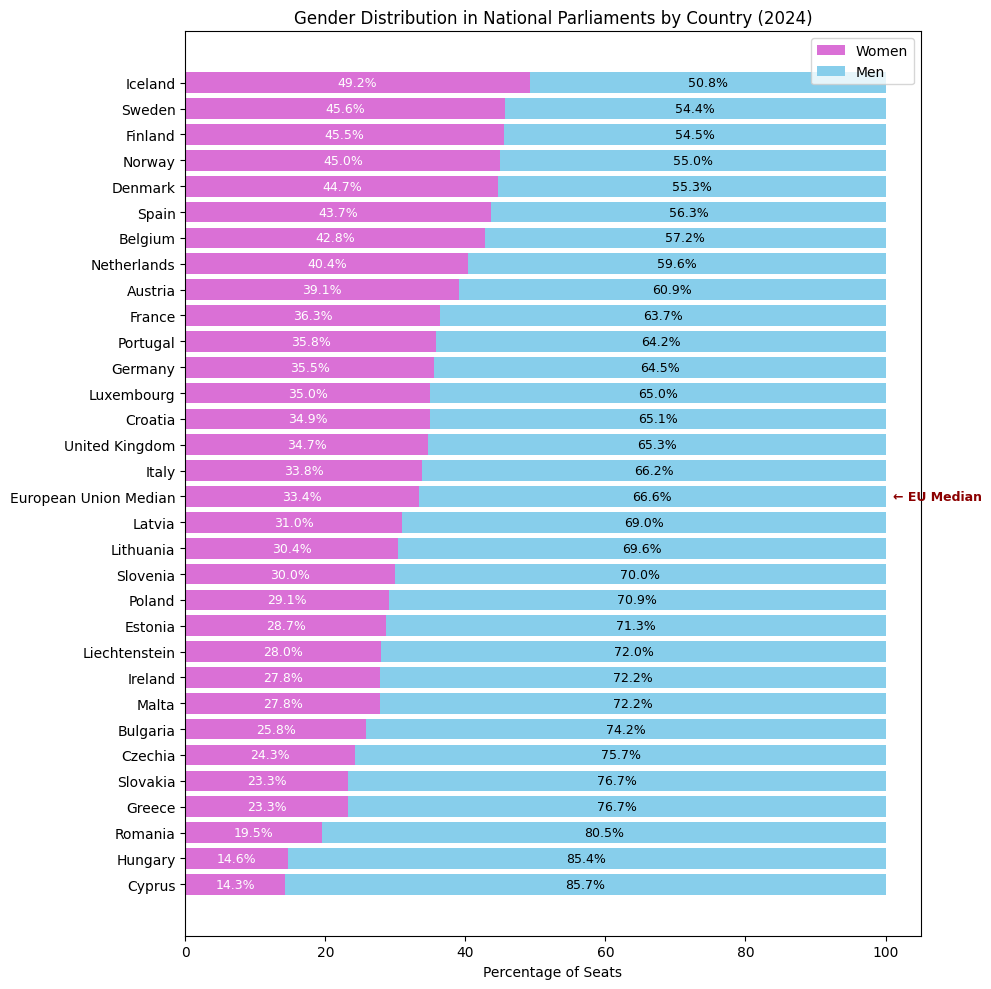

In [69]:
seats_2024 = seats_percentage_country[
    (seats_percentage_country.TIME_PERIOD == 2024) & 
    (seats_percentage_country.sex == 'Females') &
    (seats_percentage_country.org_inst == 'National parliament')
][['geo', 'OBS_VALUE']]

seats_2024.loc[seats_2024['geo'] == 'European Union - 27 countries (from 2020)', 'geo'] = 'European Union Median'
seats_2024['male'] = 100 - seats_2024['OBS_VALUE']
seats_2024 = seats_2024.sort_values(by='OBS_VALUE', ascending=True).reset_index(drop=True)
countries = seats_2024['geo']
female_percent = seats_2024['OBS_VALUE']
male_percent = seats_2024['male']

y = np.arange(len(countries)) + 3

plt.figure(figsize=(10, 10))
bars1 = plt.barh(y, female_percent, height=0.8, label='Women', color='orchid')
bars2 = plt.barh(y, male_percent, height=0.8, label='Men', color='skyblue', left=female_percent)

# Add percentage labels
for i, (f, m) in enumerate(zip(female_percent, male_percent)):
    plt.text(f / 2, y[i], f'{f:.1f}%', va='center', ha='center', color='white', fontsize=9)
    plt.text(f + m / 2, y[i], f'{m:.1f}%', va='center', ha='center', color='black', fontsize=9)

# Optional: highlight EU median
for i, country in enumerate(countries):
    if country == 'European Union Median':
        plt.text(101, y[i], '← EU Median', va='center', fontsize=9, fontweight='bold', color='darkred')

plt.yticks(y, countries)
plt.xlabel('Percentage of Seats')
plt.title('Gender Distribution in National Parliaments by Country (2024)')
plt.legend()
plt.tight_layout()
plt.show()